# Homework 3: Reproducibility in Climate Studies

* **Statistics 159/259, Spring 2022**
* **Due 03/23/2023, 23:59PM PT**
* Prof. F. Pérez and GSI F. Sapienza, Department of Statistics, UC Berkeley.
* This assignment is worth a maximum of **50 points**.
* Assignment type: **group homework assignment** (Check on Ed Discussion about group's assignments).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_162/1835719978.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

Subset all the data to just the West Coast region

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

### Question 5 [10 points]

Reproduce one of the images in Figure 2. If you feel adventurous, you can make more than one!

# Reproducing Figure 2B 

In [4]:


#array of analyzed sat surface temp

analyzed = ds['analysed_sst']

# sst recorded from 2002 to 2012

sst_2002_2006 = analyzed.sel(time = slice("2002-01-01", "2012-12-31"))

# monthly average climatology for timeframe 

average_climate = sst_2002_2006.groupby('time.dayofyear').mean()

# data from June 2013 to July 2016

sst_2013_2016 = analyzed.sel(time=slice('2013-06-01', '2016-07-31')).groupby ('time.dayofyear')

# finding the outliers 

outliers = (sst_2013_2016 - average_climate).idxmax('time').dt.month
outliers


<xarray.DataArray 'month' (lat: 251, lon: 234)>
array([[ 3.,  3.,  3., ..., 10., 10., 10.],
       [ 3.,  3.,  3., ..., 10., 10., 10.],
       [ 3.,  3.,  3., ..., 10., 10., 10.],
       ...,
       [ 7.,  6.,  6., ..., nan, nan, nan],
       [ 7.,  7.,  6., ..., nan, nan, nan],
       [ 7.,  7.,  7., ..., nan, nan, nan]])
Coordinates:
    dayofyear  (lat, lon) int64 85 85 85 85 85 85 85 ... 152 152 152 152 152 152
  * lat        (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon        (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.1 -118.0

Text(0.5, 1.0, 'Figure 2b')

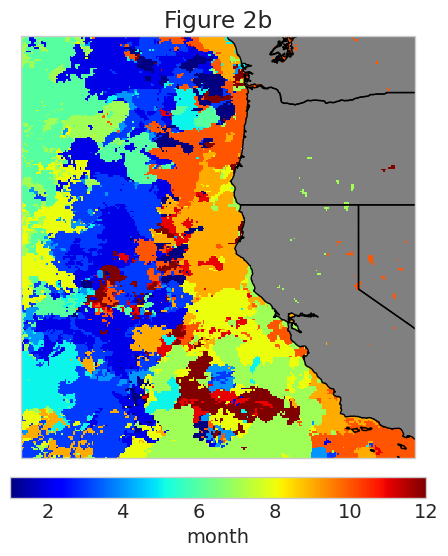

In [9]:
# Plotting
outliers.plot()
axis = plt.subplot(projection = crs)
color_bar = {'orientation' : 'horizontal', 'location' : 'bottom','pad' : 0.04,'fraction': 0.045}
outliers.plot(ax = axis, transform = crs, cmap = "jet", cbar_kwargs = color_bar)
axis.add_feature(cfeature.LAND,  color = "grey")
axis.add_feature(cfeature.STATES.with_scale("10m"))
plt.title("Figure 2b")
